In [1]:
!python -m pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv("../Task 1/Raw Data/Natural Gas Data.csv", names=['ds','y'], parse_dates=['ds'], header=0)
df.head()

,ds,y
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [4]:
# Fit the dataframe into the Prophet object

m = Prophet(weekly_seasonality=False)
m.fit(df)

# Create the date list including new dates

future = m.make_future_dataframe(periods=12, freq='m')

# Make forecast

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

12:51:44 - cmdstanpy - INFO - Chain [1] start processing
12:51:44 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
55,2025-05-31,11.853801,11.674638,12.028381
56,2025-06-30,11.848579,11.671485,12.036055
57,2025-07-31,11.983327,11.802302,12.165582
58,2025-08-31,11.949657,11.754092,12.151637
59,2025-09-30,12.153211,11.969540,12.328475


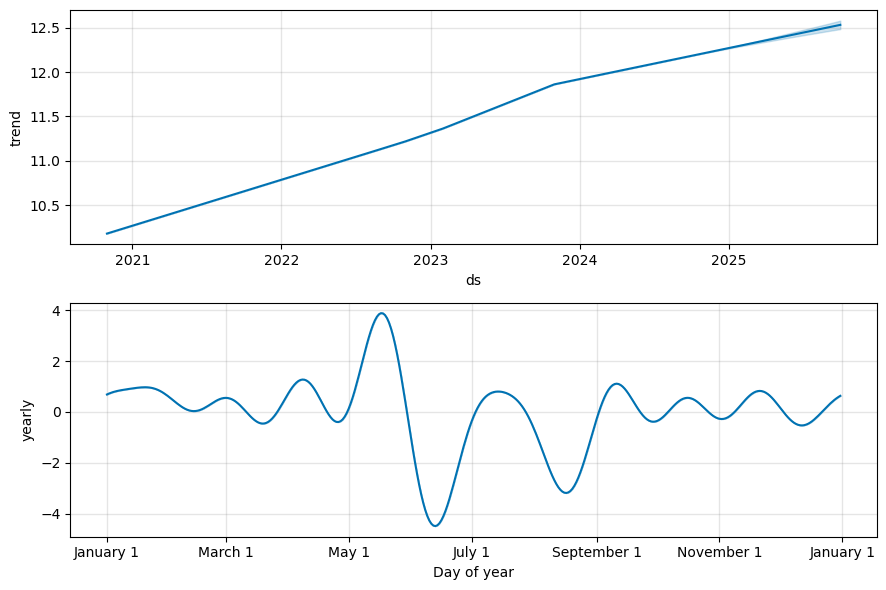

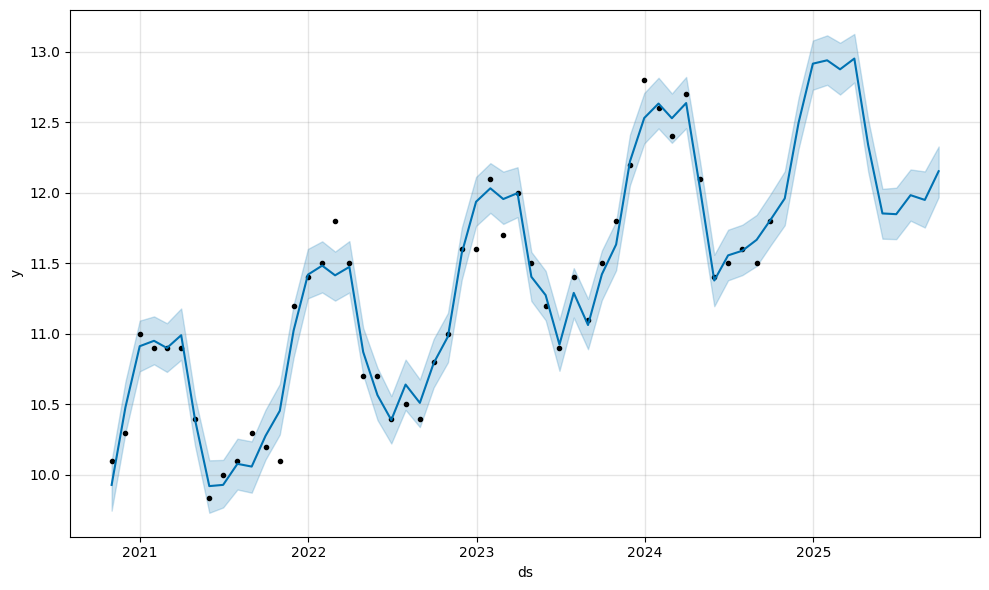

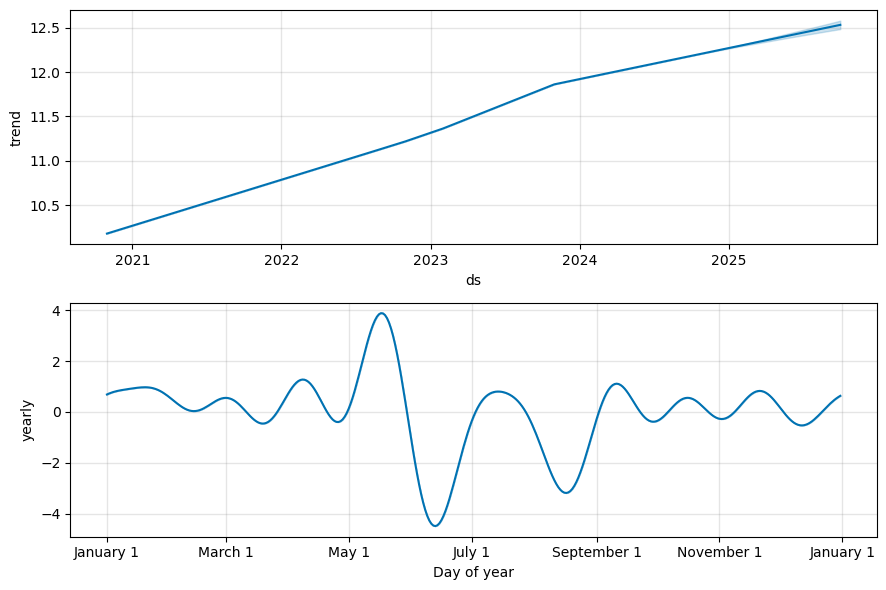

In [5]:
# Plot the forecast 

m.plot(forecast)
m.plot_components(forecast)

In [6]:
# Cross validation 

from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365.25 days', period='90 days', horizon='180 days',parallel='processes')

12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] start processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
12:51:46 - cmdstanpy - INFO - Chain [1] done processing
12:51:51 - cmdstanpy - INFO - Chain [1] done processing
12:51:51 - cmdstanpy - INFO - Chain [1

In [7]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-01-31,11.805995,11.669099,11.970328,11.5,2022-01-14
1,2022-02-28,12.351520,11.905146,12.850249,11.8,2022-01-14
2,2022-03-31,9.806038,8.922217,10.757265,11.5,2022-01-14
3,2022-04-30,16.202514,14.823578,17.603741,10.7,2022-01-14
4,2022-05-31,8.707126,6.688575,10.819852,10.7,2022-01-14


In [8]:
# Performance metrics 

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,22 days,15.246789,3.904714,2.024787,0.189868,0.042726,0.313857,0.000000
1,23 days,15.277085,3.908591,2.076240,0.194248,0.049105,0.318383,0.000000
2,25 days,15.276131,3.908469,2.074657,0.194001,0.049105,0.318247,0.000000
3,27 days,0.164276,0.405310,0.355949,0.030182,0.027758,0.030647,0.166667
4,45 days,0.138651,0.372359,0.335085,0.028165,0.027758,0.028155,0.166667


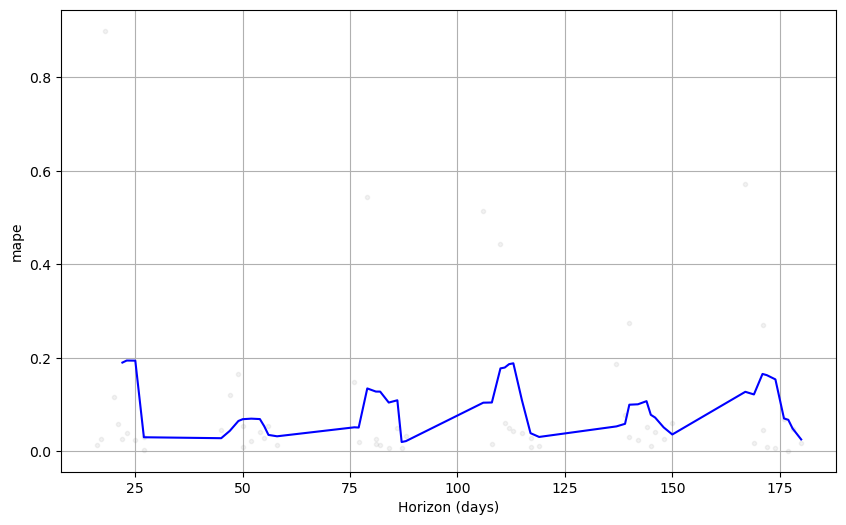

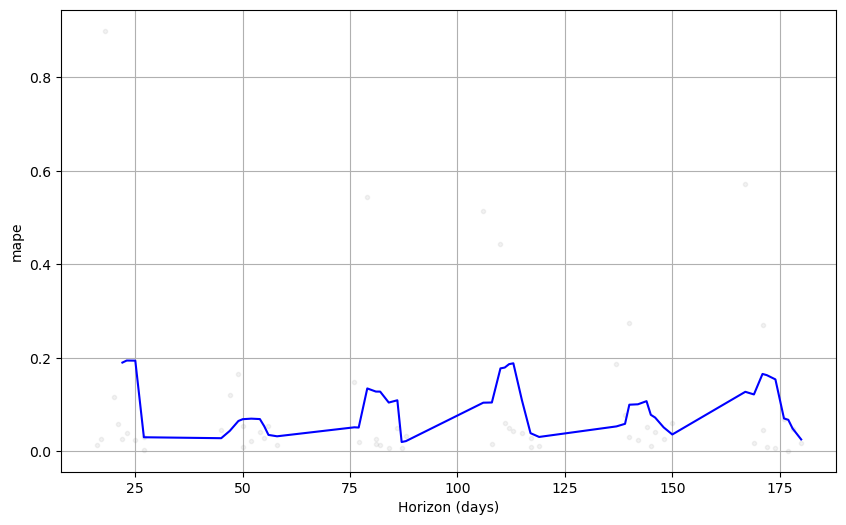

In [9]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')

In [10]:
## Consider only the data correspond to monthly data

ape = abs((df_cv['yhat']-df_cv['y'])/df_cv['y'])
mape = ape.mean()

In [11]:
mape

0.09535444873339484

<Axes: >

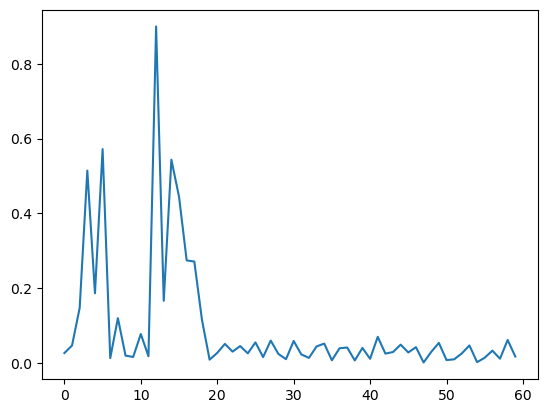

In [12]:
ape.plot()

In [13]:
# Parameter tuning

import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}


## Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mape = []

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='180 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mape.append(abs((df_cv['yhat']-df_cv['y'])/df_cv['y']).mean())

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mape
print(tuning_results)

12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1]

12:52:19 - cmdstanpy - INFO - Chain [1] done processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] start processing
12:52:20 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale      mape
0                     0.001                     0.01  0.018037
1                     0.001                     0.10  0.018866
2                     0.001                     1.00  0.027256
3                     0.001                    10.00  0.028207
4                     0.010                     0.01  0.017896
5                     0.010                     0.10  0.021749
6                     0.010                     1.00  0.030693
7                     0.010                    10.00  0.030607
8                     0.100                     0.01  0.028831
9                     0.100                     0.10  0.029782
10                    0.100                     1.00  0.037587
11                    0.100                    10.00  0.057984
12                    0.500                     0.01  0.073627
13                    0.500                     0.10  0.062660
14                    0.500                     1.00  0

12:53:30 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Refine the model

m = Prophet(weekly_seasonality=False, changepoint_prior_scale=0.010, seasonality_prior_scale=0.01)
m.fit(df)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

12:53:30 - cmdstanpy - INFO - Chain [1] start processing
12:53:30 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
55,2025-05-31,12.154083,11.959235,12.364848
56,2025-06-30,12.082159,11.870993,12.284891
57,2025-07-31,12.278643,12.074470,12.494186
58,2025-08-31,12.207995,11.996940,12.398717
59,2025-09-30,12.445451,12.241239,12.662567


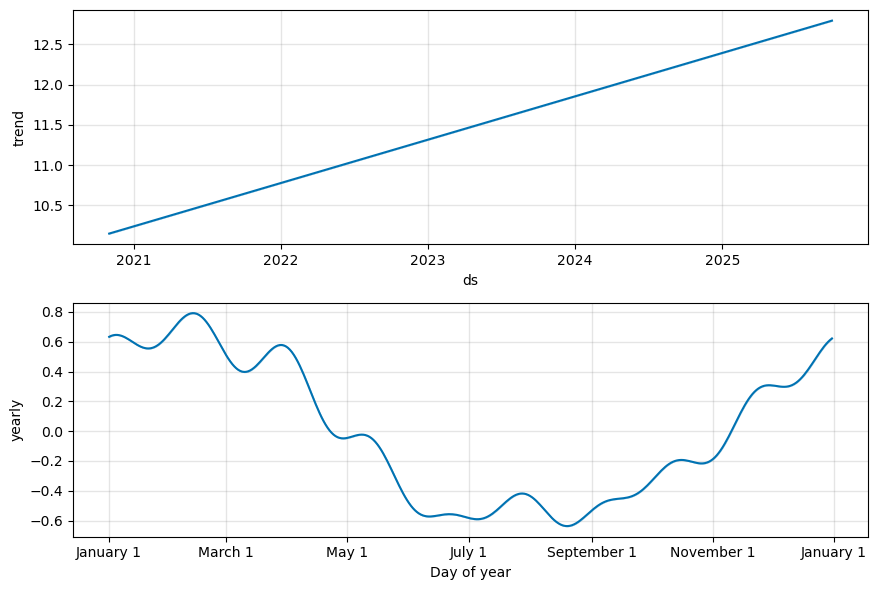

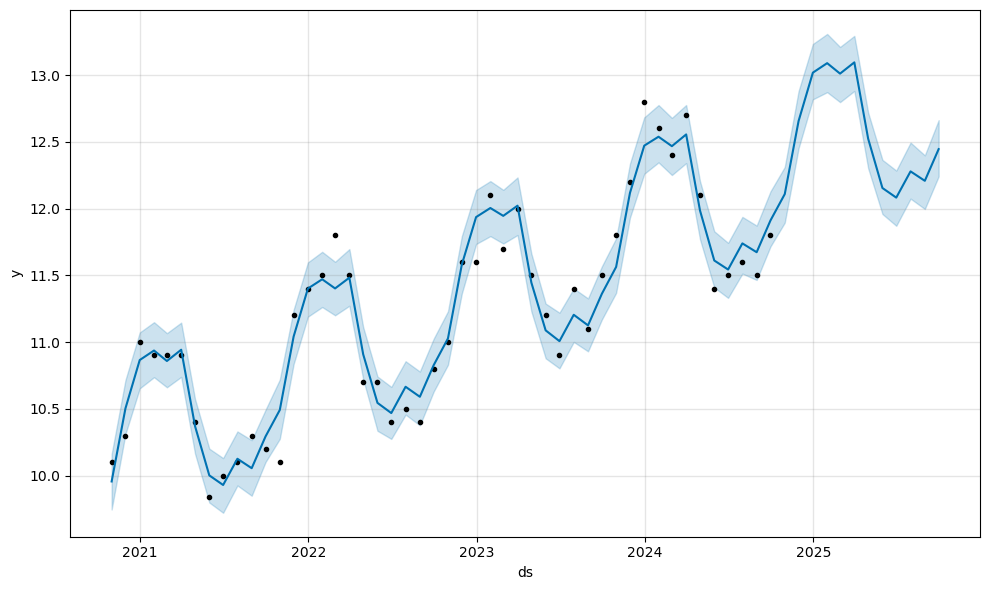

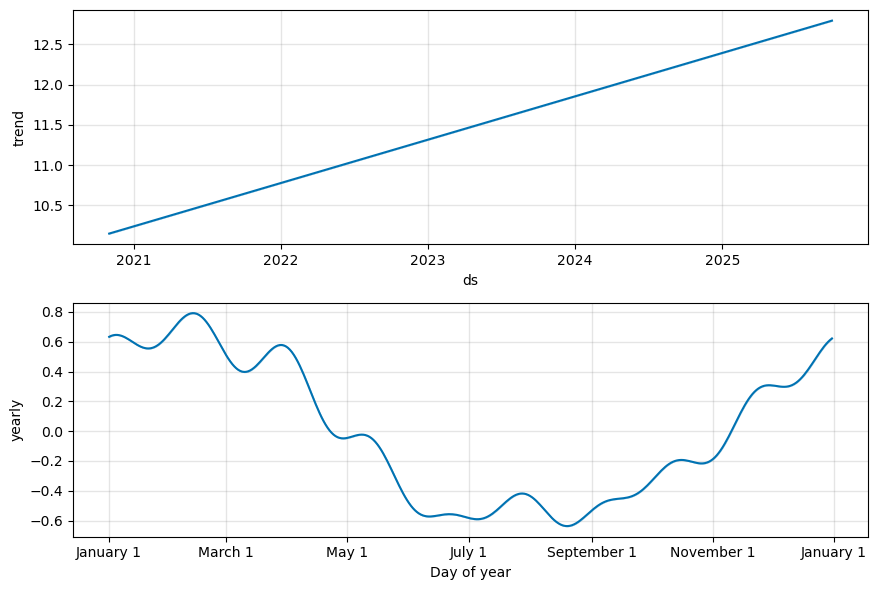

In [15]:
# Plot the forecast 

m.plot(forecast)
m.plot_components(forecast)


In [16]:
# Cross validation 

from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730.5 days', period='90 days', horizon='180 days',parallel='processes')

12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Performance metrics 

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,23 days,0.067849,0.260479,0.258805,0.022178,0.022909,0.022430,0.000000
1,25 days,0.094652,0.307656,0.305468,0.025972,0.024738,0.026319,0.000000
2,27 days,0.046674,0.216042,0.168223,0.014103,0.008405,0.014272,0.666667
3,50 days,0.031363,0.177097,0.144409,0.012154,0.008405,0.012070,0.666667
4,52 days,0.036942,0.192203,0.170332,0.014657,0.013528,0.014596,0.666667


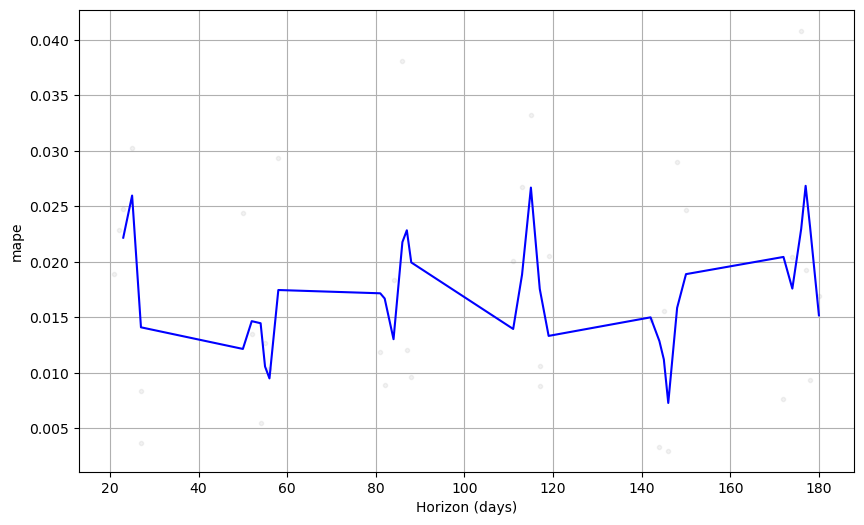

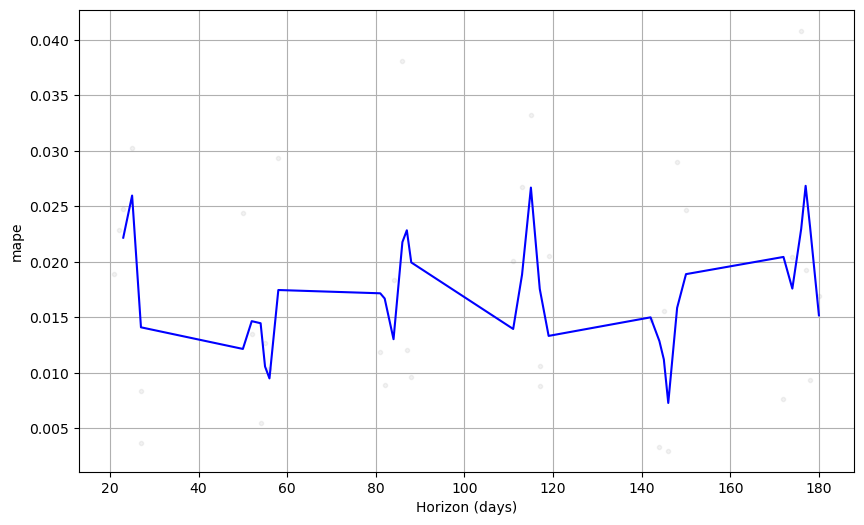

In [18]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')

In [19]:
## Consider only the data correspond to monthly data

ape = abs((df_cv['yhat']-df_cv['y'])/df_cv['y'])
mape = ape.mean()
mape

0.01745562993704263

<Axes: >

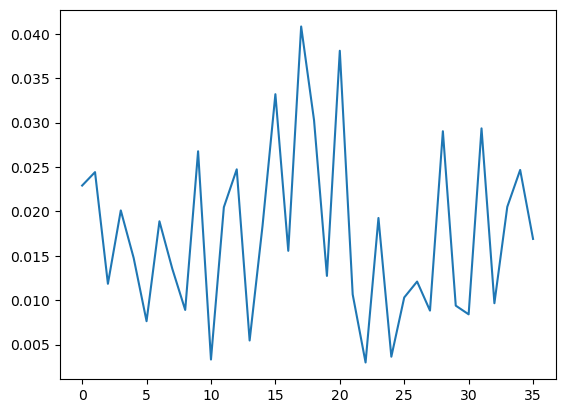

In [20]:
ape.plot()

In [21]:
forecast['yhat'][-12:]

48    12.108579
49    12.655979
50    13.018266
51    13.089412
52    13.011002
53    13.095352
54    12.523452
55    12.154083
56    12.082159
57    12.278643
58    12.207995
59    12.445451
Name: yhat, dtype: float64

In [24]:
header = ['ds','yhat']
forecast.to_csv("Natural Gas Data Forecast Result.csv", sep=",", columns=header,index=False)

In [ ]:
print(forecast)